# 1.Import libs and load data

## 1.1  Importing Libraries

In [70]:
!pip install tensorflow 

In [71]:
#!pip install tensorflow-gpu==2.7.0

In [72]:
!pip install opencv-python

In [73]:
!pip install matplotlib

In [74]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.4.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [75]:
import tensorflow as tf
import os

In [76]:
#avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

## 1.2 remove dodgy images

In [77]:
import cv2
import imghdr

In [78]:
data_dir = 'data'

In [79]:
image_exts = ['jpeg','jpg','bmp','png']

### optional explanation (run if you want) 

In [80]:
os.listdir(data_dir) #gives the folders inside data folder

['happy', 'sad']

In [81]:
os.listdir(os.path.join(data_dir,'happy')) # gives all the files inside data/happy folder 

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-8715

In [82]:
img = cv2.imread(os.path.join('data','happy','154006829.jpg'))

In [83]:
img.shape

(3744, 5616, 3)

In [84]:
import matplotlib.pyplot as plt

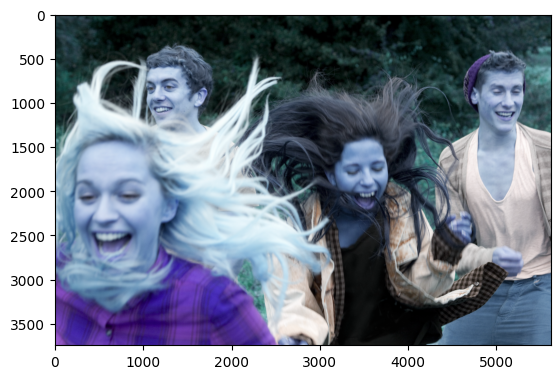

In [85]:
plt.imshow(img) #NOT COLORED ONLY 3 COLORS

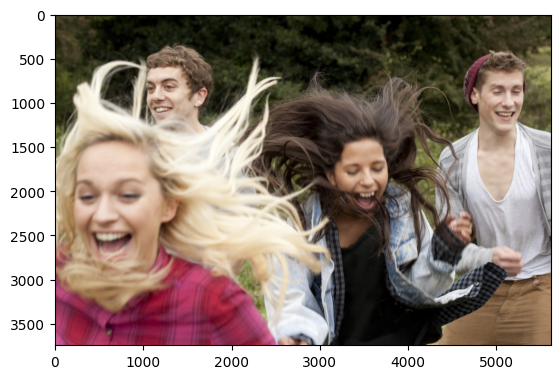

In [86]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #COLORED IMAGE

###  removing dodgy images continues

In [87]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) #image extension
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image {}'.format(image_path))

## 1.3 load data

In [88]:
import numpy as np
from matplotlib import pyplot as plt

In [89]:
data = tf.keras.utils.image_dataset_from_directory('data')
#this pipeline loads data into the model also resize it , and do some
#manipulatons tooo. 
## for more info use ---> tf.keras.utils.image_dataset_from_directory?? 

Found 304 files belonging to 2 classes.


In [90]:
data_iterator = data.as_numpy_iterator()
#generator which helps to access data pipeline. this looops over and over

In [91]:
batch = data_iterator.next()
#grabbing one batch using generator

In [92]:
batch[0] # representing images as numpy arrays

array([[[[1.67480469e+01, 1.47480469e+01, 1.57480469e+01],
         [1.67480469e+01, 1.47480469e+01, 1.57480469e+01],
         [1.67480469e+01, 1.47480469e+01, 1.57480469e+01],
         ...,
         [1.09173302e+02, 7.21733017e+01, 5.31733017e+01],
         [1.09105698e+02, 7.31056976e+01, 5.10397606e+01],
         [1.09438957e+02, 7.34389572e+01, 4.94389572e+01]],

        [[1.52441406e+01, 1.32441406e+01, 1.42441406e+01],
         [1.52441406e+01, 1.32441406e+01, 1.42441406e+01],
         [1.52441406e+01, 1.32441406e+01, 1.42441406e+01],
         ...,
         [1.06583572e+02, 7.03394318e+01, 4.90718498e+01],
         [1.08976562e+02, 7.29765625e+01, 5.07148438e+01],
         [1.01965546e+02, 6.59655457e+01, 4.19655418e+01]],

        [[1.52597656e+01, 1.32597656e+01, 1.42597656e+01],
         [1.52597656e+01, 1.32597656e+01, 1.42597656e+01],
         [1.52597656e+01, 1.32597656e+01, 1.42597656e+01],
         ...,
         [1.09229828e+02, 7.32298279e+01, 4.92298317e+01],
         [

In [93]:
batch[1] # representing labels 1 - sad , 0 - happy

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

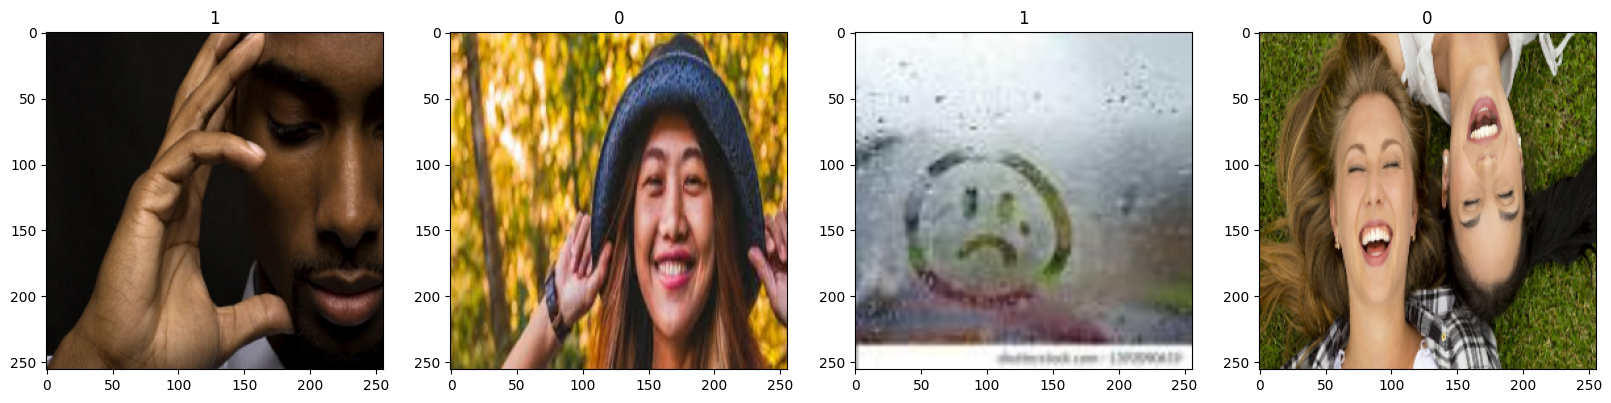

In [94]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2.Preprocess data

## 2.1 scale data

In [95]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 304 files belonging to 2 classes.


In [96]:
data = data.map(lambda x,y:(x/255,y)) # when we load data we get the values
#in the numpy array within the range 0 to 255 0--> black pixel, 1---> white
#to ensure that all pixels have a similar scale therefore we divide by 255

In [97]:
scaled_iterator = data.as_numpy_iterator()

In [98]:
batch = scaled_iterator.next()

In [99]:
batch[0]

array([[[[9.84313726e-01, 1.00000000e+00, 9.96078432e-01],
         [9.79427099e-01, 9.95113373e-01, 9.91191804e-01],
         [9.73643243e-01, 9.89329517e-01, 9.85407948e-01],
         ...,
         [8.25137854e-01, 9.00352299e-01, 9.45098042e-01],
         [8.19607854e-01, 8.98039222e-01, 9.41176474e-01],
         [8.15686285e-01, 8.94117653e-01, 9.37254906e-01]],

        [[9.84547436e-01, 1.00000000e+00, 9.95844722e-01],
         [9.82276320e-01, 9.98663783e-01, 9.88342524e-01],
         [9.78880048e-01, 9.96246934e-01, 9.87283528e-01],
         ...,
         [8.25137854e-01, 9.00352299e-01, 9.45098042e-01],
         [8.19607854e-01, 8.98039222e-01, 9.41176474e-01],
         [8.15686285e-01, 8.94117653e-01, 9.37254906e-01]],

        [[9.86289799e-01, 1.00000000e+00, 9.94238019e-01],
         [9.85206664e-01, 1.00000000e+00, 9.87473786e-01],
         [9.85289574e-01, 1.00000000e+00, 9.91452217e-01],
         ...,
         [8.25137854e-01, 9.00352299e-01, 9.45098042e-01],
         [

In [100]:
batch[0].min()

0.0

In [101]:
batch[0].max()

1.0

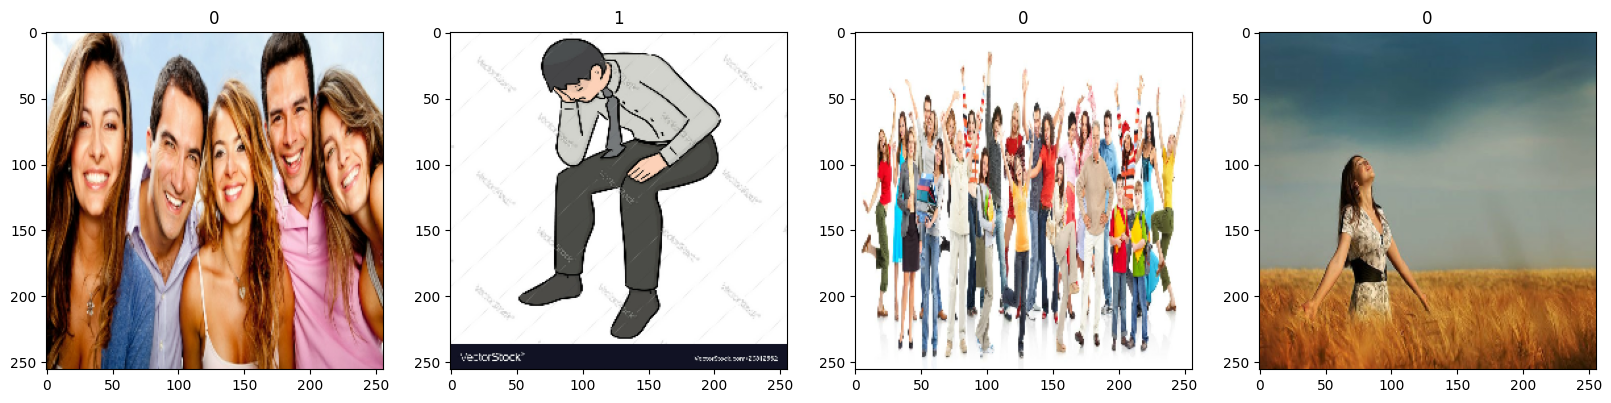

In [102]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 split data

In [103]:
len(data)

10

In [104]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [105]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3.deep model

## 3.1 build model

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [107]:
model = Sequential()

In [108]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

E:\AIML\ImageClassifier\imageclass\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [109]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [111]:
logdir = 'logs'

In [112]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [113]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 453ms/step - accuracy: 0.4689 - loss: 0.9979 - val_accuracy: 0.5000 - val_loss: 0.6844
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 436ms/step - accuracy: 0.6025 - loss: 0.6784 - val_accuracy: 0.5781 - val_loss: 0.6465
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - accuracy: 0.6874 - loss: 0.5935 - val_accuracy: 0.8125 - val_loss: 0.5048
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 431ms/step - accuracy: 0.8141 - loss: 0.4902 - val_accuracy: 0.9375 - val_loss: 0.3718
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 440ms/step - accuracy: 0.8647 - loss: 0.3882 - val_accuracy: 0.9062 - val_loss: 0.3708
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 432ms/step - accuracy: 0.8855 - loss: 0.3206 - val_accuracy: 0.9375 - val_loss: 0.2645
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 444ms/step - accuracy: 0.9198 - loss: 0.2760 - val_accuracy: 0.9531 - val_loss: 0.1525
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 437ms/step - accuracy: 0.9556 - loss: 0.1758 - val_accuracy: 1.0000 - val_loss:

## 3.3 plot performance

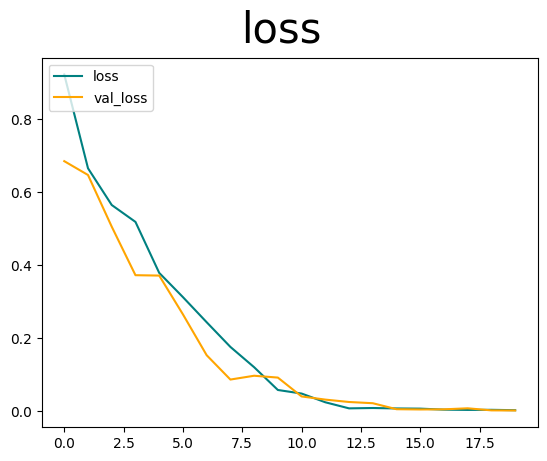

In [114]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('loss',fontsize=30)
plt.legend(loc='upper left')
plt.show()

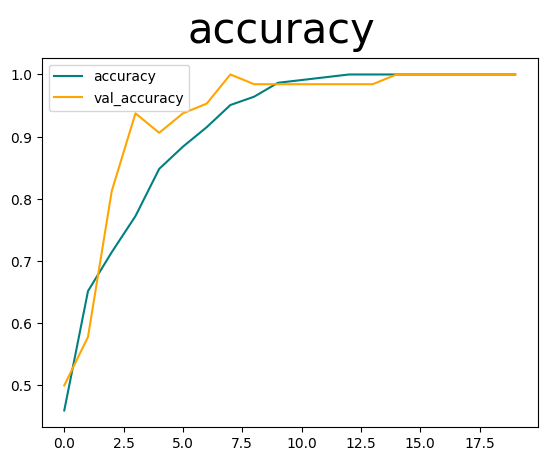

In [115]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=30)
plt.legend(loc='upper left')
plt.show()

# 4. Evaluate Performance

## 4.1 evaluate

In [116]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [117]:
pre = Precision()
re  = Recall()
acc = BinaryAccuracy()

In [118]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [119]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')


Precision: 1.0, Recall: 1.0, Accuracy: 1.0


## 4.2 test

In [120]:
import cv2

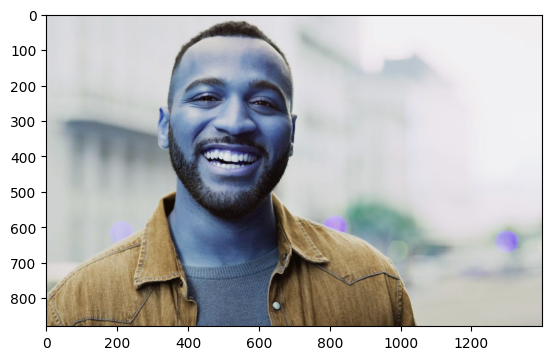

In [121]:
img = cv2.imread('05-12-21-happy-people.jpg')
plt.imshow(img)
plt.show()

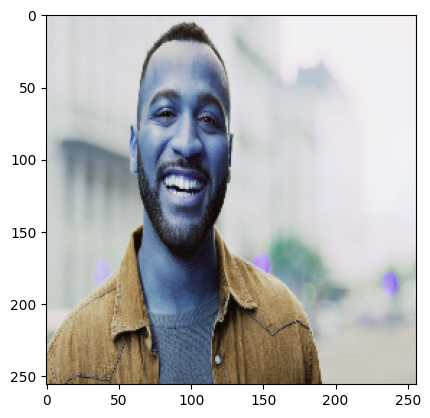

In [122]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [123]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [124]:
yhat

array([[0.01974211]], dtype=float32)

In [125]:
if yhat> 0.5:
    print(f'predicted class is sad')
else:
    print(f'predicted class is happy')

predicted class is happy
